In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch.optim as optim

In [2]:
# 1. 数据加载和预处理
# 假设你的股票数据保存在一个 CSV 文件中
# 股票数据包含日期和收盘价，例如 "Date", "Close"

data = pd.read_csv('stock_dataset_1.csv')  # 你需要替换成你自己的数据路径

In [3]:
# 查看前几行数据
print(data.head())

         date     high
0  2015/12/11  3455.55
1  2015/12/10  3503.65
2   2015/12/9  3495.70
3   2015/12/8  3518.65
4   2015/12/7  3543.95


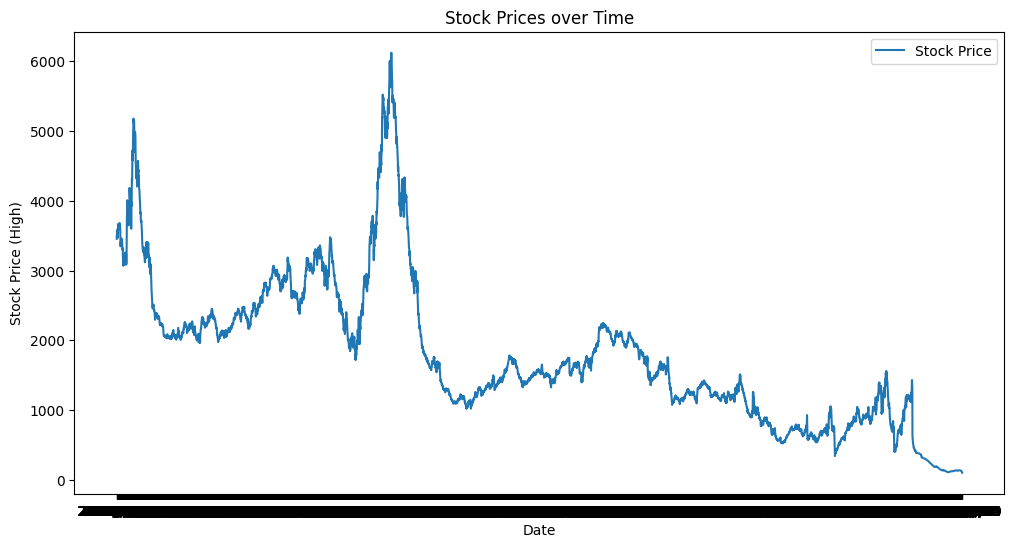

In [4]:
# 2. 可视化数据
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['high'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (High)')
plt.title('Stock Prices over Time')
plt.legend()
plt.show()

In [4]:
# 3. 数据预处理
# 将日期列转换为datetime格式
data['date'] = pd.to_datetime(data['date'])

In [5]:
# 使用 MinMaxScaler 将 'high' 列归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['high'].values.reshape(-1, 1))

In [6]:
# 将数据按时间步长拆分成训练集和测试集
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

In [7]:
time_step = 60  # 使用过去60天的数据预测未来的股票价格
X, y = create_dataset(scaled_data, time_step)

In [8]:
# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Reshape X_train and X_test for RNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
# 将数据转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [11]:
# 3. 定义手写 RNN 模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        # 定义RNN层
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # 定义输出层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN前向传播
        rnn_out, _ = self.rnn(x)
        # 选择最后时刻的输出进行预测
        out = self.fc(rnn_out[:, -1, :])
        return out

In [21]:
import torch
import torch.nn as nn

# 3. 定义手写 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        # 定义LSTM层
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # 定义输出层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM前向传播
        lstm_out, _ = self.lstm(x)
        # 选择最后时刻的输出进行预测
        out = self.fc(lstm_out[:, -1, :])
        return out

In [21]:
import torch
import torch.nn as nn

# 3. 定义手写 GRU 模型
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        # 定义GRU层
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        # 定义输出层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # GRU前向传播
        gru_out, _ = self.gru(x)
        # 选择最后时刻的输出进行预测
        out = self.fc(gru_out[:, -1, :])
        return out

In [23]:
# 初始化模型、损失函数和优化器
input_size = 1
hidden_size = 50
output_size = 1
model = RNNModel(input_size, hidden_size, output_size)

In [25]:
# 使用均方误差作为损失函数，Adam优化器
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# 4. 训练模型
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # 前向传播
    outputs = model(X_train_tensor)
    
    # 计算损失
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))
    
    # 反向传播和优化
    loss.backward()
    optimizer.step()
    
    # 每10个epoch打印一次损失值
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.0268
Epoch [20/200], Loss: 0.0235
Epoch [30/200], Loss: 0.0231
Epoch [40/200], Loss: 0.0176
Epoch [50/200], Loss: 0.0149
Epoch [60/200], Loss: 0.0122
Epoch [70/200], Loss: 0.0085
Epoch [80/200], Loss: 0.0033
Epoch [90/200], Loss: 0.0012
Epoch [100/200], Loss: 0.0004
Epoch [110/200], Loss: 0.0004
Epoch [120/200], Loss: 0.0004
Epoch [130/200], Loss: 0.0003
Epoch [140/200], Loss: 0.0003
Epoch [150/200], Loss: 0.0003
Epoch [160/200], Loss: 0.0003
Epoch [170/200], Loss: 0.0002
Epoch [180/200], Loss: 0.0002
Epoch [190/200], Loss: 0.0002
Epoch [200/200], Loss: 0.0002


In [29]:
# 5. 预测股票价格
model.eval()
with torch.no_grad():
    predicted_stock_price = model(X_test_tensor)

In [31]:
# 6. 反归一化预测结果
predicted_stock_price = predicted_stock_price.numpy()
y_test_actual = y_test_tensor.numpy().reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test_actual)

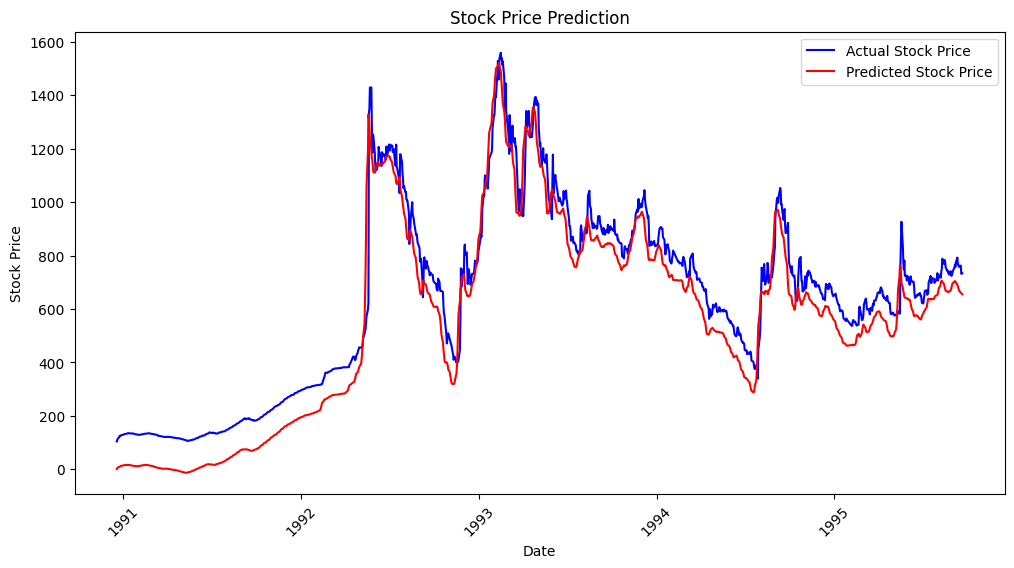

In [33]:
# 7. 可视化预测结果
plt.figure(figsize=(12,6))
plt.plot(data['date'][-len(y_test_actual):].values, y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(data['date'][-len(y_test_actual):].values, predicted_stock_price, color='red', label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [35]:
# 8. 计算均方误差
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_actual, predicted_stock_price)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9864.642578125
